In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import load_iris

In [2]:
data = load_iris()

In [3]:
X = data.data
y = data.target

In [4]:
X.shape , y.shape

((150, 4), (150,))

In [5]:
target_col = pd.DataFrame(y,columns=["Species"])
target_col.head()

,Species
0,0
1,0
2,0
3,0
4,0


In [6]:
target_col.shape

(150, 1)

In [7]:
col = ["SepalLengthCm",	"SepalWidthCm" ,	"PetalLengthCm" ,	"PetalWidthCm"]

In [8]:
df  = pd.DataFrame(X,columns=col)

In [9]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [10]:
df.shape

(150, 4)

In [13]:
dfs = pd.concat([df,target_col],axis=1)

In [16]:
dfs

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


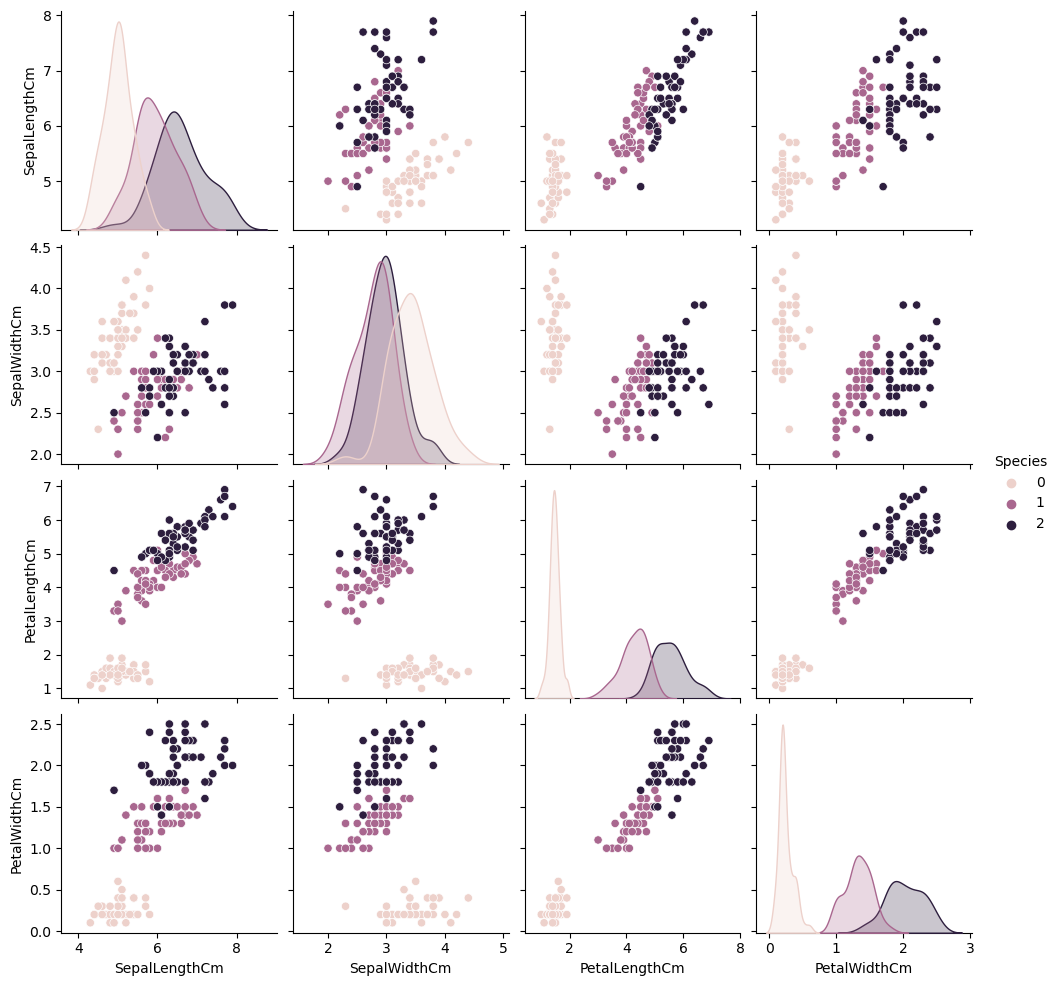

In [20]:
import seaborn as sns
sns.pairplot(dfs,hue='Species')

In [21]:
# to make the prediction of the species hard we will only take sepallength and sepalwidth

In [27]:
df = dfs[dfs["Species"] !=0][["SepalLengthCm","SepalWidthCm","Species"]]

In [28]:
df

,SepalLengthCm,SepalWidthCm,Species
50,7.0,3.2,1
51,6.4,3.2,1
52,6.9,3.1,1
53,5.5,2.3,1
54,6.5,2.8,1
...,...,...,...
145,6.7,3.0,2
146,6.3,2.5,2
147,6.5,3.0,2
148,6.2,3.4,2


In [29]:
df.shape
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [34]:
X

,SepalLengthCm,SepalWidthCm
50,7.0,3.2
51,6.4,3.2
52,6.9,3.1
53,5.5,2.3
54,6.5,2.8
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [32]:
clf1 = LogisticRegression()
clf2 = RandomForestClassifier()
clf3 = KNeighborsClassifier()
estimators = [('lr',clf1),('rf',clf2),('knn',clf3)]

In [35]:
for estimator in estimators:
    x = cross_val_score(estimator[1],X,y,cv=10,scoring='accuracy')
    print(estimator[0],np.round(np.mean(x),2))

lr 0.75
rf 0.58
knn 0.62


In [37]:
from sklearn.ensemble import VotingClassifier

# Hard Voting

In [38]:
vc = VotingClassifier(estimators=estimators,voting='hard')
x = cross_val_score(vc,X,y,cv=10,scoring='accuracy')
print(np.round(np.mean(x),2))

0.67


# Soft Voting

In [39]:
vc = VotingClassifier(estimators=estimators,voting='soft')
x = cross_val_score(vc,X,y,cv=10,scoring='accuracy')
print(np.round(np.mean(x),2))

0.65


In [40]:
for i in range(1,4):
    for j in range(1,4):
        for k in range(1,4):
            vc = VotingClassifier(estimators=estimators,voting='soft',weights=[i,j,k])
            x = cross_val_score(vc,X,y,cv=10,scoring='accuracy')
            print("for i={},j={},k={}".format(i,j,k),np.round(np.mean(x),2))

for i=1,j=1,k=1 0.66
for i=1,j=1,k=2 0.65
for i=1,j=1,k=3 0.65
for i=1,j=2,k=1 0.64
for i=1,j=2,k=2 0.64
for i=1,j=2,k=3 0.65
for i=1,j=3,k=1 0.61
for i=1,j=3,k=2 0.63
for i=1,j=3,k=3 0.63
for i=2,j=1,k=1 0.67
for i=2,j=1,k=2 0.67
for i=2,j=1,k=3 0.66
for i=2,j=2,k=1 0.66
for i=2,j=2,k=2 0.64
for i=2,j=2,k=3 0.64
for i=2,j=3,k=1 0.67
for i=2,j=3,k=2 0.64
for i=2,j=3,k=3 0.64
for i=3,j=1,k=1 0.71
for i=3,j=1,k=2 0.69
for i=3,j=1,k=3 0.69
for i=3,j=2,k=1 0.68
for i=3,j=2,k=2 0.66
for i=3,j=2,k=3 0.65
for i=3,j=3,k=1 0.64
for i=3,j=3,k=2 0.65
for i=3,j=3,k=3 0.64


# Classifiers of Same Algo

In [41]:
from sklearn.svm import SVC

In [42]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=2)

svm1 = SVC(probability=True, kernel='poly', degree=1)
svm2 = SVC(probability=True, kernel='poly', degree=2)
svm3 = SVC(probability=True, kernel='poly', degree=3)
svm4 = SVC(probability=True, kernel='poly', degree=4)
svm5 = SVC(probability=True, kernel='poly', degree=5)

estimators = [('svm1',svm1),('svm2',svm2),('svm3',svm3),('svm4',svm4),('svm5',svm5)]

for estimator in estimators:
    x = cross_val_score(estimator[1],X,y,cv=10,scoring='accuracy')
    print(estimator[0],np.round(np.mean(x),2))

svm1 0.85
svm2 0.85
svm3 0.89
svm4 0.81
svm5 0.86


In [43]:
vc1 = VotingClassifier(estimators=estimators,voting='soft')
x = cross_val_score(vc1,X,y,cv=10,scoring='accuracy')
print(np.round(np.mean(x),2))

0.93
